In [57]:
import pandas as pd
import seaborn as sns
import missingno as ms
import matplotlib.pyplot as mat
import sklearn as skl
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
tt = pd.read_csv('titanic.csv')
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


the above cell describes the Titanic dataset which gives a tabular representation of the passenger data of The Titanic.

In [4]:
tt.head(10) #displays only the first 10 contents of the table 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


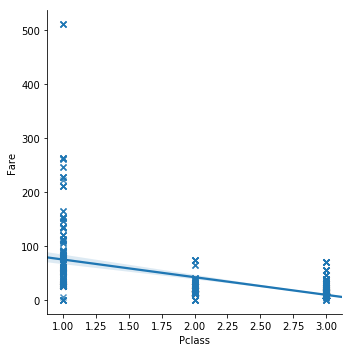

In [5]:
sns.lmplot(x= 'Pclass', y= 'Fare', data = tt,markers='x')

In [6]:
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


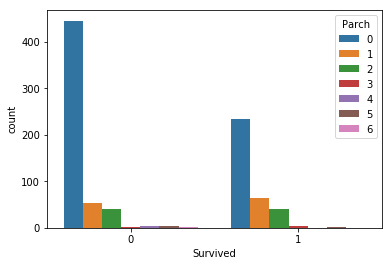

In [7]:
sns.countplot(x = 'Survived', data = tt, hue = 'Parch')

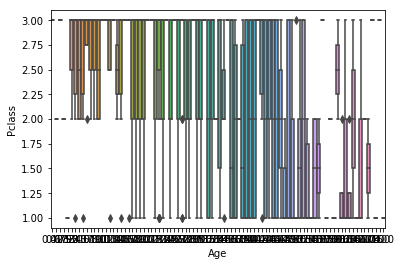

In [8]:
sns.boxplot(y = 'Pclass',x = 'Age' ,data = tt)

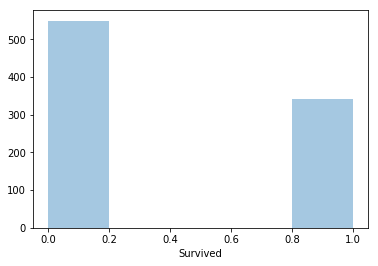

In [9]:
sns.distplot(tt['Survived'],bins=5,kde= False)

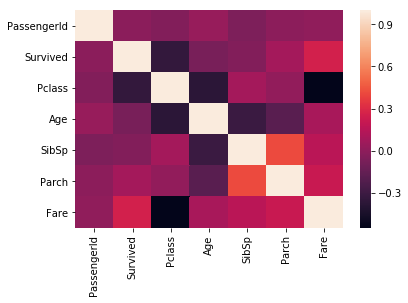

In [10]:
#Pandas slicing the dataframe.
col = list(tt.columns)
stats_df = tt[col[:]]
#Correlation of the different varibles can be known by ".corr()" function on pandas dataframe.
corr = stats_df.corr()
sns.heatmap(corr)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

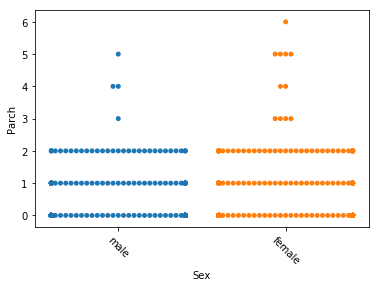

In [11]:
sns.swarmplot(x = 'Sex', y = 'Parch', data = tt)
mat.xticks(rotation = -45)

In [13]:
tt.shape

(891, 12)

In [14]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


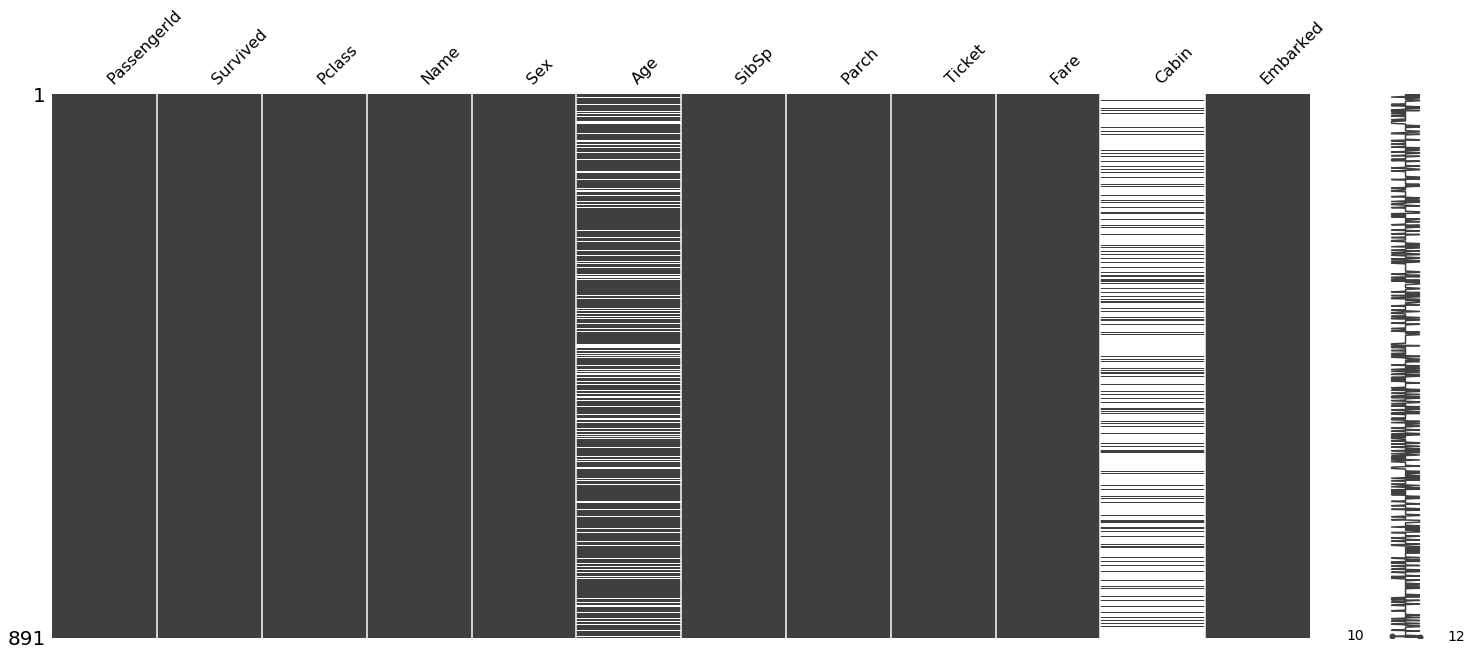

In [19]:
ms.matrix(tt)

In [15]:
tt[Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


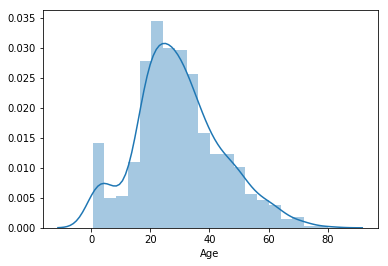

In [21]:
sns.distplot(tt[tt['Age'].notnull()]['Age'])

In [16]:
tt['Embarked'] = tt['Embarked'].fillna('S')

In [22]:
tt['Age'] = tt['Age'].interpolate()

In [23]:
tt['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


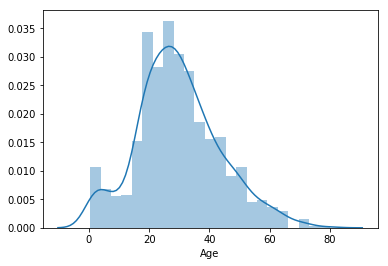

In [25]:
sns.distplot(tt['Age'])

In [27]:
len(tt['Cabin'].drop_duplicates())

148

In [28]:
tt = tt.drop('Cabin', axis=1)

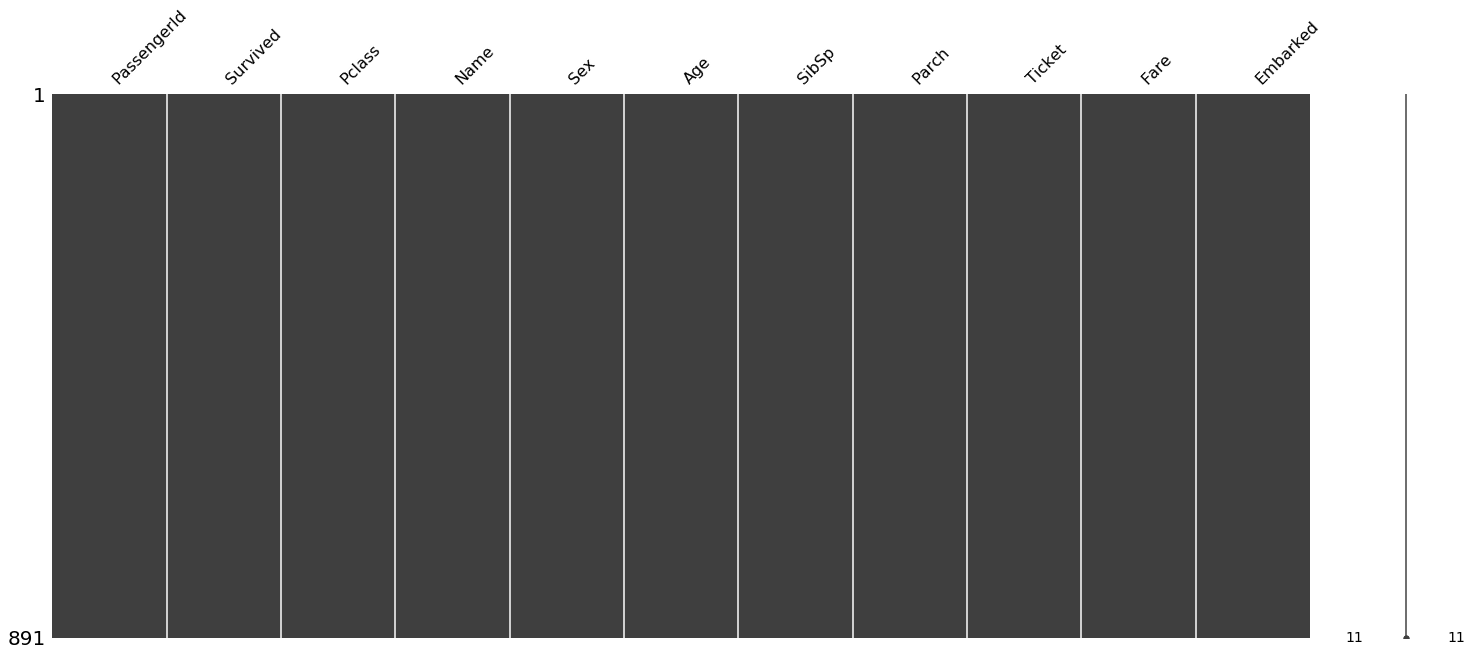

In [29]:
ms.matrix(tt)

In [30]:
tt = tt.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


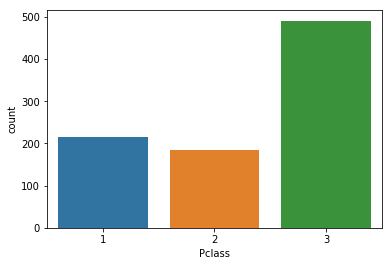

In [32]:
sns.countplot(x='Pclass', data=tt)

c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


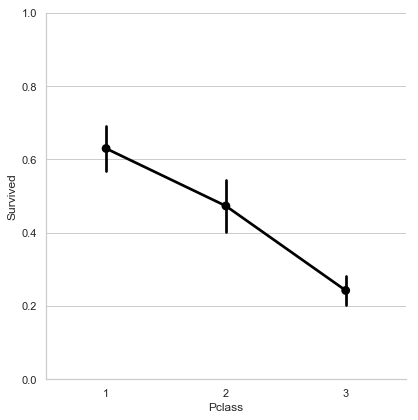

In [33]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=tt, x_vars=['Pclass'], y_vars='Survived', size=6)
g.map(sns.pointplot, color=sns.xkcd_rgb["black"])
g.set(ylim=(0, 1))

In [34]:
tt['is_child'] = tt['Age'].apply(lambda x: 1 if x <= 15 else 0)

c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\users\dell\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


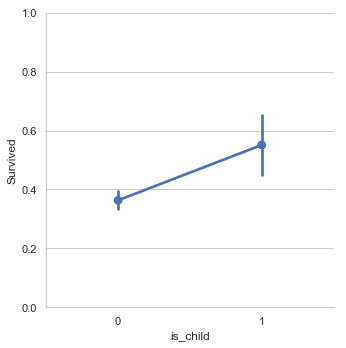

In [35]:
i = sns.PairGrid(data=tt, x_vars=['is_child'], y_vars='Survived', size=5)
i.map(sns.pointplot)
i.set(ylim=(0, 1))

In [36]:
tt['family'] = tt['SibSp'] + tt['Parch']
tt = tt.drop(['SibSp', 'Parch'], axis=1)

In [37]:
tt['is_female'] = tt['Sex'].apply(lambda x: 1 if x == 'female' else 0)
tt = tt.drop('Sex', axis=1)
tt.head()

,Survived,Pclass,Age,Fare,Embarked,is_child,family,is_female
0,0,3,22.0,7.2500,S,0,1,0
1,1,1,38.0,71.2833,C,0,1,1
2,1,3,26.0,7.9250,S,0,0,1
3,1,1,35.0,53.1000,S,0,1,1
4,0,3,35.0,8.0500,S,0,0,0


In [38]:
tt = pd.get_dummies(tt, prefix=['is'])
tt.head()

,Survived,Pclass,Age,Fare,is_child,family,is_female,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,1
1,1,1,38.0,71.2833,0,1,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,0,0,1
3,1,1,35.0,53.1000,0,1,1,0,0,1
4,0,3,35.0,8.0500,0,0,0,0,0,1


In [39]:
X, y = tt.drop(['Survived'], axis=1), tt['Survived']

In [49]:
tr_X, ts_X, tr_y, ts_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

In [50]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [51]:
def build_classifier(model):
    classifier = model()
    classifier.fit(tr_X, tr_y)
    print(classifier.score(ts_X, ts_y))
    return classifier

In [58]:
decision_tree = build_classifier(GradientBoostingClassifier)

0.8161434977578476
